# RICH Simulator Validation

## This notebook validates the physics implementation of the RICH detector simulator.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import yaml
import sys
import os
from pathlib import Path

In [2]:
sys.path.append('../src')
from physics.RICH_simulator import RICHSimulator
from physics import constants
from utils import visualisations, metrics

In [3]:
# Load configuration
with open('../config/default.yaml', 'r') as file:
    config = yaml.safe_load(file)
print("Configuration loaded.")
print(yaml.dump(config, default_flow_style=False))

Configuration loaded.
dataset:
  data_save_path: data/processed/RICH_dataset.npz
  num_samples: 200000
  test_ratio: 0.1
  train_ratio: 0.8
  val_ratio: 0.1
diffusion:
  beta_end: 0.02
  beta_schedule: linear
  beta_start: 0.0001
  timesteps: 1000
model:
  channels: 1
  condition_dim: 4
  dim: 64
  dim_mults:
  - 1
  - 2
  - 4
  - 8
paths:
  final_model_save_path: models/best_model.pth
  log_dir: logs/
simulator:
  detection_efficiency: 0.2
  detector_distance: 1
  image_size: 32
  momentum_range:
  - 0
  - 100.0
  pixel_pitch: 0.0025
  radiator_length: 1.0
  refractive_index: 1.0005
  single_photon_resolution: 1.0
training:
  batch_size: 128
  checkpoint_dir: models/checkpoints/
  learning_rate: 1e-4
  num_epochs: 100



In [4]:
# Initialise simulator
simulator = RICHSimulator(config)

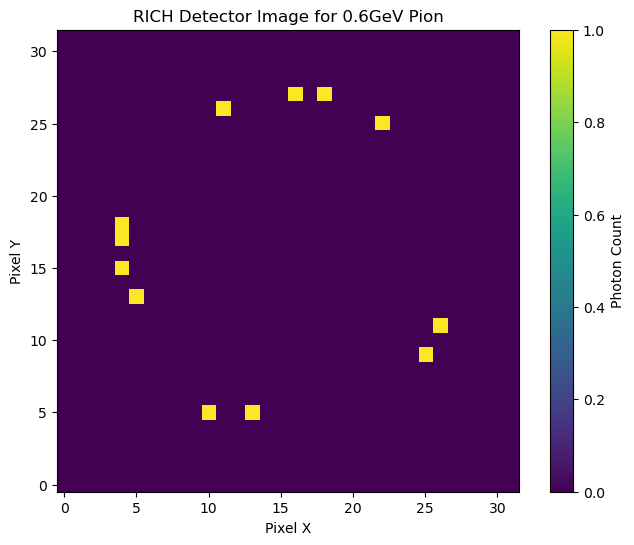

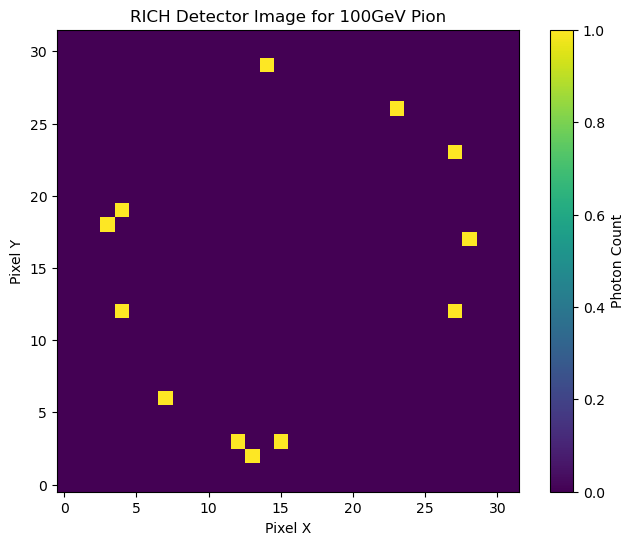

In [5]:
test_image, _ = simulator.generate_event('pi', 10)
test_image_2, _ = simulator.generate_event('pi', 100)

visualisations.plot_rich_image(test_image, title='RICH Detector Image for 0.6GeV Pion')
visualisations.plot_rich_image(test_image_2, title='RICH Detector Image for 100GeV Pion')

Simulation successful.


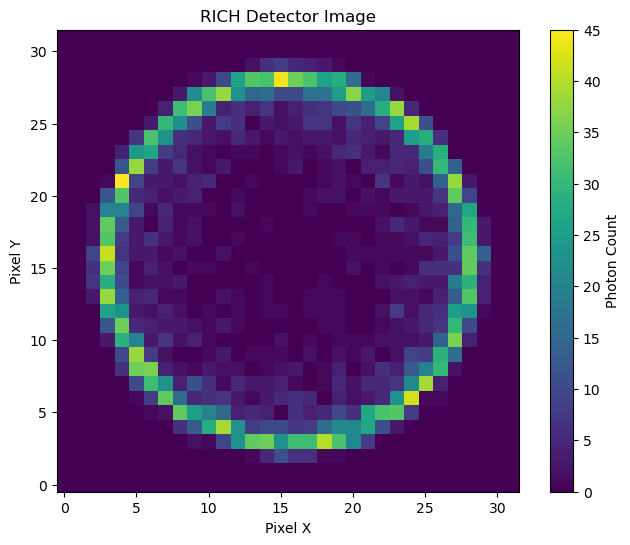

In [6]:
events = simulator.generate_events(1000, momentum_distribution='1/p2')
images = events['images']
if test_image is not None:
    print("Simulation successful.")
    visualisations.plot_rich_images(images)
else:
    print("Particle is below the Cherenkov threshold.")

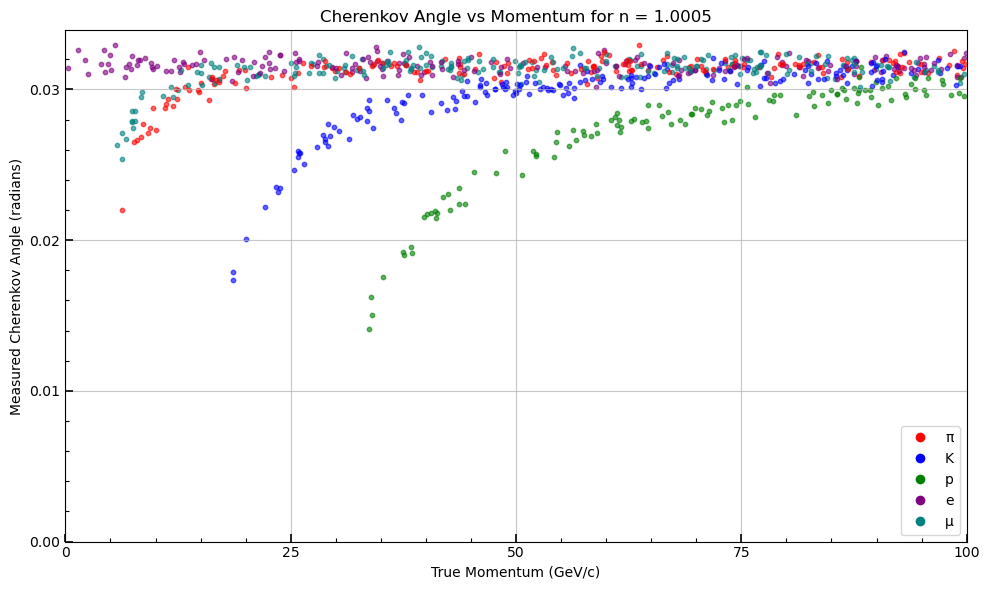

In [ ]:
visualisations.plot_cherenkov_angle_vs_momentum(simulator, num_events=2000, momentum_range=[0.1, 100], momentum_distribution='uniform')

In [ ]:
visualisations.photon_count(simulator, num_events=2000, particle_types=['electron','pi','K'], momentum_range=[0.01, 100])

In [ ]:
from data.generate_data import generate_dataset
output_path = Path('../data/processed')
output_path.mkdir(parents=True, exist_ok=True)
    
# Generate dataset
generate_dataset(config, output_path, num_samples_per_type=1000)

Generating 200 events for pi
Generating 200 events for K
Generating 200 events for electron
Generating 200 events for muon
Generating 200 events for proton
Dataset generated with 1000 events
Images saved to: ..\data\processed\rich_images.npz
Metadata saved to: ..\data\processed\rich_metadata.csv
